# hypothesis testing

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

## Has the network latency gone up since we switched internet service providers?
### Ho: Latency hasn't changed or is less than that before the switch of isp

### Ha: Latency has gone up after the switch


## True Positive

low p-value
Ho is false, latency has gone up
avg latency after the switch is higher than the average latency before the switch


## False Positive

low p-value
Ho is false
a significant difference found in latency prior to and after
we found the latency prior was lower than our measured, external factors impact latency
server crash, downloads, many users etc

### False Negative

Ho is true 
high p-value
we found the latency to be equal, sampling bias, technology, time of day of test

    
### True Negative
high p-value
Ho is true
Latency has stayed the same or gone down



## Is the website redesign any good?

## Ho: Traffic has stayed the same or got worse

## Ha: Traffic has statistically increased significantly


### True Positive

 low p-value
 Ho is rejected and false, 
 Traffic has statistically increased significantly



### False Positive

 low p-value
 Ho is rejected and true 
 traffic increased, due to external factors, holiday season


### False Negative

 Ho is accepted
 high p-value
 traffic looked like it stayed the same, sample size

    
### True Negative
 high p-value
 Ho is true, failed to be rejected
 traffic stayed the same


## Is our television ad driving more sales?


## Ho: sales have remained the same

## Ha: sales have statistically increased, significantly


### True Positive

 low p-value
 Ho is rejected and false
 sales has statistically increased, significantly



### False Positive

 low p-value
 Ho is rejected and true 
 sales increased, due to external factors


### False Negative

 Ho is accepted
 high p-value
 sales looked like it stayed the same, but they didnt, sample size

    
### True Negative
 high p-value
 Ho is true, failed to be rejected
 sales stayed the same, tv ad was a flop

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env
import numpy as np


### exercise 1:

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

null hypothesis: there is no statistical difference in average sell time
alternate hypothesis: there is a statistical difference in average sell time

alpha = .05

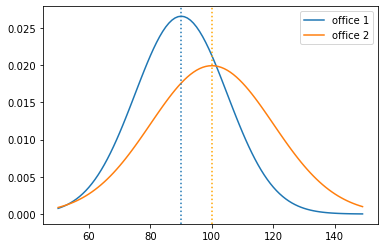

In [103]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)


plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

In [105]:
alpha = 0.05

t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)
t,p

if p < alpha:
    print(f'We can accept the alternate hypothesis. We can say there is a statistical difference.')
else:
    print(f'We cannot reject the null hypothesis. We cannot say there is a statistical difference.')

We can accept the alternate hypothesis. We can say there is a statistical difference.


### Load the mpg dataset and use it to answer the following questions:




In [2]:
from pydataset import data

mpg = data('mpg')
mpg.info()
mpg['class']=mpg['class'].astype('string')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### exercise 2:
Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

H-null: there is not a statistical difference in fuel-efficiency

H-alt: there is a statistical difference in fuel-efficiency

In [106]:
mpg['avg_econ'] =  (mpg.cty + mpg.hwy)/2
mpg08 = mpg[mpg.year==2008]
mpg99 = mpg[mpg.year==1999]
print(mpg08.avg_econ.var())
print(mpg99.avg_econ.var())
alpha = .05

t, p = stats.ttest_ind(mpg08.avg_econ, mpg99.avg_econ, equal_var=False)
t, p / 2

if p<alpha:
    print('We reject H-null because there is a statistical difference in fuel-efficiency.')
else:
    print('We fail to reject H-null because there is not a difference in fuel-efficiency between 1999 and 2008')

24.097480106100797
27.122605363984682
We fail to reject H-null because there is not a difference in fuel-efficiency between 1999 and 2008


### exrcise 3:
Are compact cars more fuel-efficient than the average car?

H-null: compact cars have the same or worse fuel-efficiency than average cars

H-alt: compact cars have better fuel-efficiency than average cars


In [107]:
mpg['avg_econ'] =  (mpg.cty + mpg.hwy)/2
avg_car=mpg[mpg['class']!='compact'].avg_econ
compact = mpg[mpg['class']=='compact'].avg_econ


print(avg_car.var())
print(compact.var())

t, p = stats.ttest_ind(avg_car, compact, equal_var=False)
t,p

if p < alpha:
    print('We reject the H-null because there is no significant difference between the average car and compact car')
else:
    print('We fail to reject H-null because there is a differnce in fuel-efficiency between the average car and compact car')

23.652794548904602
12.442876965772433
We reject the H-null because there is no significant difference between the average car and compact car


### exercise 4:

Do manual cars get better gas mileage than automatic cars?

H-null: Gas mileage is the same or worse in manual cars compared to automatic.

H-alt: Gas mileage is better in manual cars compared to automatic.



In [108]:
mpg['trans']=mpg.trans.astype('string')
man = mpg[mpg.trans.str.startswith('m')].avg_econ
auto = mpg[mpg.trans.str.startswith('a')].avg_econ

print(man.var())
print(auto.var())

t, p = stats.ttest_ind(man,auto, equal_var=False)
t,p/2
if p < alpha:
    print('we reject H-null')
else:
    print('We fail to reject H-null')

26.635167464114826
21.942777233382337
we reject H-null


## Correlation
### exercise 1:

Use the telco_churn data. Does tenure correlate with monthly charges? 

H-null: tenure and monthly charges are independent

H-alt: tenure and monthly charges are dependent

We can reject the null hypothesis


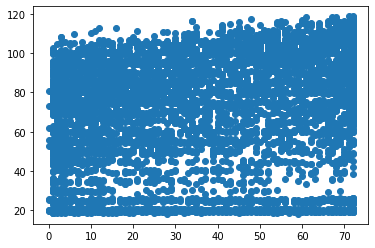

In [109]:
df = pd.read_csv('telco_churn.csv')
df=df.dropna()
x = df.tenure
y = df.MonthlyCharges
print(plt.scatter(x,y))
corr, p = stats.pearsonr(x, y)
corr, p
if p < alpha:
    print('We can reject the null hypothesis')
else:
    print('We reject the null hypothesis and accept the alternate')

In [95]:

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,internet_only
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,False
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,False
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,False
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,False
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,False
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,False


Total charges? 

H-null: total charges and churn are independent

H-alt: total charges are dependent

We reject the null hypothesis


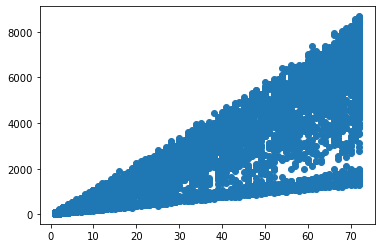

In [110]:

df.TotalCharges = df["TotalCharges"].replace(' ', np.nan).astype(float)
df=df.dropna()
x = df.tenure
y = df.TotalCharges
print(plt.scatter(x,y))
corr, p = stats.pearsonr(x, y)
corr, p

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

What happens if you control for phone and internet service?

We reject the null hypothesis


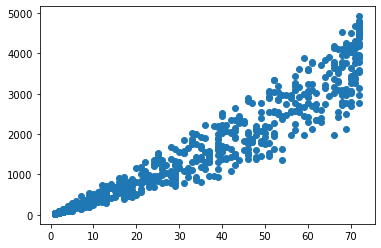

In [111]:
df['internet_only']=df['PhoneService']=='No'
x = df.tenure.where(df.internet_only ==True).dropna()
y = df.TotalCharges.where(df.internet_only==True).dropna()
print(plt.scatter(x,y))
corr, p = stats.pearsonr(x, y)
corr, p

if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

(0.9814648859044319, 0.0)

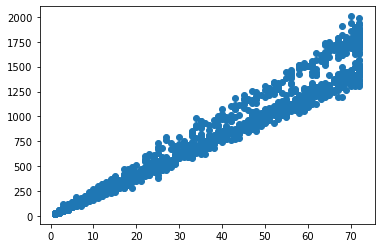

In [146]:
df['phone_only']=df['InternetService']=='No'
x = df.tenure.where(df.phone_only ==True).dropna()
y = df.TotalCharges.where(df.phone_only==True).dropna()
print(plt.scatter(x,y))
corr, p = stats.pearsonr(x, y)
corr, p


### exercise 2:
Use the employees database.
Is there a relationship between how long an employee has been with the company and their salary?
Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [51]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
salaries = pd.read_sql('''select emp_no, datediff(curdate(),hire_date) as tenure,salary from employees
                        join salaries using(emp_no)
                        group by emp_no, salary
                        ''', url)

In [42]:
salaries

,tenure,salary
0,13151,60117
1,13151,62102
2,13151,66074
3,13151,66596
4,13151,66961
...,...,...
2844042,8976,63707
2844043,8976,67043
2844044,8976,70745
2844045,8976,74327


(0.157629197069865, 0.0)

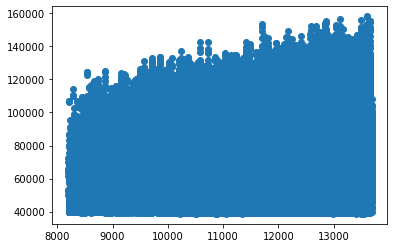

In [40]:
x = salaries.tenure
y = salaries.salary
print(plt.scatter(x,y))
corr, p = stats.pearsonr(x, y)
corr, p


In [47]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
salaries = pd.read_sql('''select emp_no, datediff(curdate(),hire_date) as tenure, count(title) as title from employees
                        join titles using (emp_no)
                        group by emp_no
                        ''', url)

In [49]:
salaries.title.max()

3

(0.2665989299136428, 0.0)

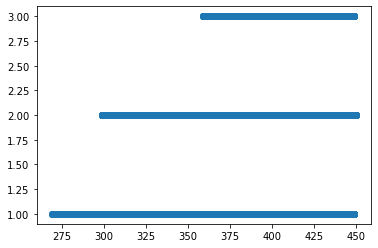

In [37]:
x = (salaries.tenure/365)*12
y = salaries.title
print((x,y))
corr, p = stats.pearsonr(x, y)
corr, p/2


## comparison
### exercise 1:

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

H-null: there is no correlation between codeup students and using a macbook

H-alt: there is a correlation between codeup students and using a macbook

In [112]:
codeup = pd.DataFrame({'codeup student':[49,1], 'not codeup student':[20,30]},index=['uses macbook','doesnt use macbook'])

alpha = .05
chi2, p, degf, expected = stats.chi2_contingency(codeup)

print('Observed\n')
print(codeup.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000
We reject the null hypothesis


### exercise 2:
Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

H-null: vehicle drive type and transmission type are indepndent

H-alt: vehicle drive type and transmission type are dependent

In [63]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [113]:
mpg['is_auto'] = mpg.trans.str.startswith('a')

drive_trans = pd.crosstab(mpg.is_auto, mpg.drv)

chi2, p, degf, expected = stats.chi2_contingency(drive_trans)

print('Observed\n')
print(drive_trans.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed

[[28 41  8]
 [75 65 17]]
---
Expected

[[33.89316239 34.88034188  8.22649573]
 [69.10683761 71.11965812 16.77350427]]
---

chi^2 = 3.1368
p     = 0.2084
We fail to reject the null hypothesis


Use the data from the employees database to answer these questions:

Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

H-null: employees gender and if they work in sales or marketing is independent.

H-alt: employees gender and if the work in sales or marketing is dependent.

In [68]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
emp = pd.read_sql('''select gender, e.emp_no, dept_name from employees as e
                        join dept_emp as de using (emp_no) 
                        join departments as d using (dept_no)
                        where de.to_date > now()
                        ''', url)
emp

,gender,emp_no,dept_name
0,M,10038,Customer Service
1,F,10049,Customer Service
2,M,10060,Customer Service
3,F,10088,Customer Service
4,F,10112,Customer Service
...,...,...,...
240119,F,499966,Sales
240120,M,499976,Sales
240121,M,499980,Sales
240122,F,499986,Sales


In [114]:
sm = emp[(emp['dept_name'] == "Sales") | (emp['dept_name']=="Marketing")]

gender_comp = pd.crosstab(sm.gender, sm.dept_name)
chi2, p, degf, expected = stats.chi2_contingency(gender_comp)

print('Observed\n')
print(gender_comp.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed

[[11929 31184]
 [18209 46817]]
---
Expected

[[12015.45782743 31097.54217257]
 [18122.54217257 46903.45782743]]
---

chi^2 = 1.4178
p     = 0.2338
We fail to reject the null hypothesis


Is an employee's gender independent of whether or not they are or have been a manager?

H-null: gender and managerial status are independent

H-alt: gender and managerial status are dependent

In [116]:
url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'
emp = pd.read_sql('''select gender, e.emp_no, dept_name, title from employees as e
                        join dept_emp as de using (emp_no) 
                        join departments as d using (dept_no) 
                        join titles as title using (emp_no)
                        
                        ''', url)

In [117]:
emp['mgr'] = emp['title']=='Manager'

In [118]:
gen_mgr = pd.crosstab(emp.gender, emp.mgr)
chi2, p, degf, expected = stats.chi2_contingency(gen_mgr)

print('Observed\n')
print(gen_mgr.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

Observed

[[195908     13]
 [293971     11]]
---
Expected

[[1.95911402e+05 9.59803063e+00]
 [2.93967598e+05 1.44019694e+01]]
---

chi^2 = 1.4622
p     = 0.2266
We fail to reject the null hypothesis
